In [42]:
from unsupervised.Clusters.kmeans import KMeans
from unsupervised.Clusters.kmedoids import KMedoids
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [43]:

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

C:\Users\DO IT WISER\AppData\Local\Temp\ipykernel_10496\2318863479.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[:, 0], X[:, 1], s=10, c=color_map, cmap='viridis')  # Utiliza la paleta de colores 'viridis'
C:\Users\DO IT WISER\AppData\Local\Temp\ipykernel_10496\2318863479.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], s=10, c=color_map, cmap='viridis')  # Utiliza la paleta de colores 'viridis'


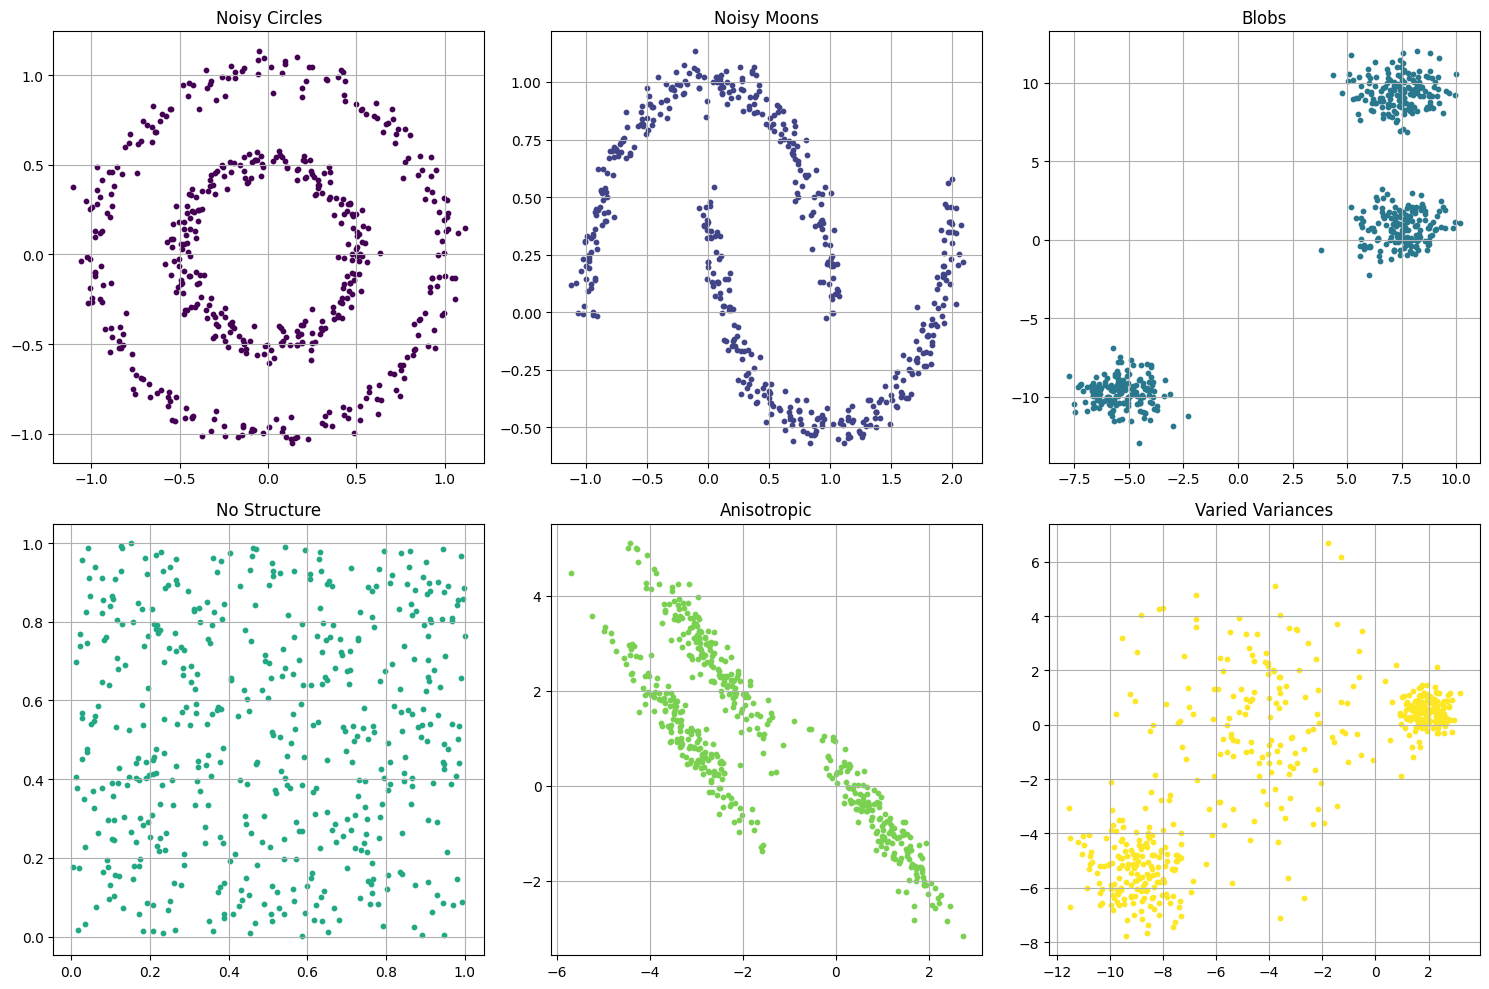

In [44]:
import matplotlib.pyplot as plt
import numpy as np


# Define a function to plot the datasets
def plot_dataset(ax, X, title, color_map):
    ax.scatter(X[:, 0], X[:, 1], s=10, c=color_map, cmap='viridis')  # Utiliza la paleta de colores 'viridis'
    ax.set_title(title)
    ax.grid(True)

# Plot each dataset
datasets = [
    ("Noisy Circles", noisy_circles[0]),
    ("Noisy Moons", noisy_moons[0]),
    ("Blobs", blobs[0]),
    ("No Structure", no_structure[0]),
    ("Anisotropic", aniso[0]),
    ("Varied Variances", varied[0])
]

colors = cm.viridis(np.linspace(0, 1, len(datasets)))  # Genera una lista de colores basada en la paleta 'viridis'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Crea una figura con 3 columnas y 2 filas

for ax, (name, data), color in zip(axes.flatten(), datasets, colors):
    plot_dataset(ax, data, name, color)

plt.tight_layout()  # Ajusta automáticamente el diseño para evitar superposiciones
plt.show()




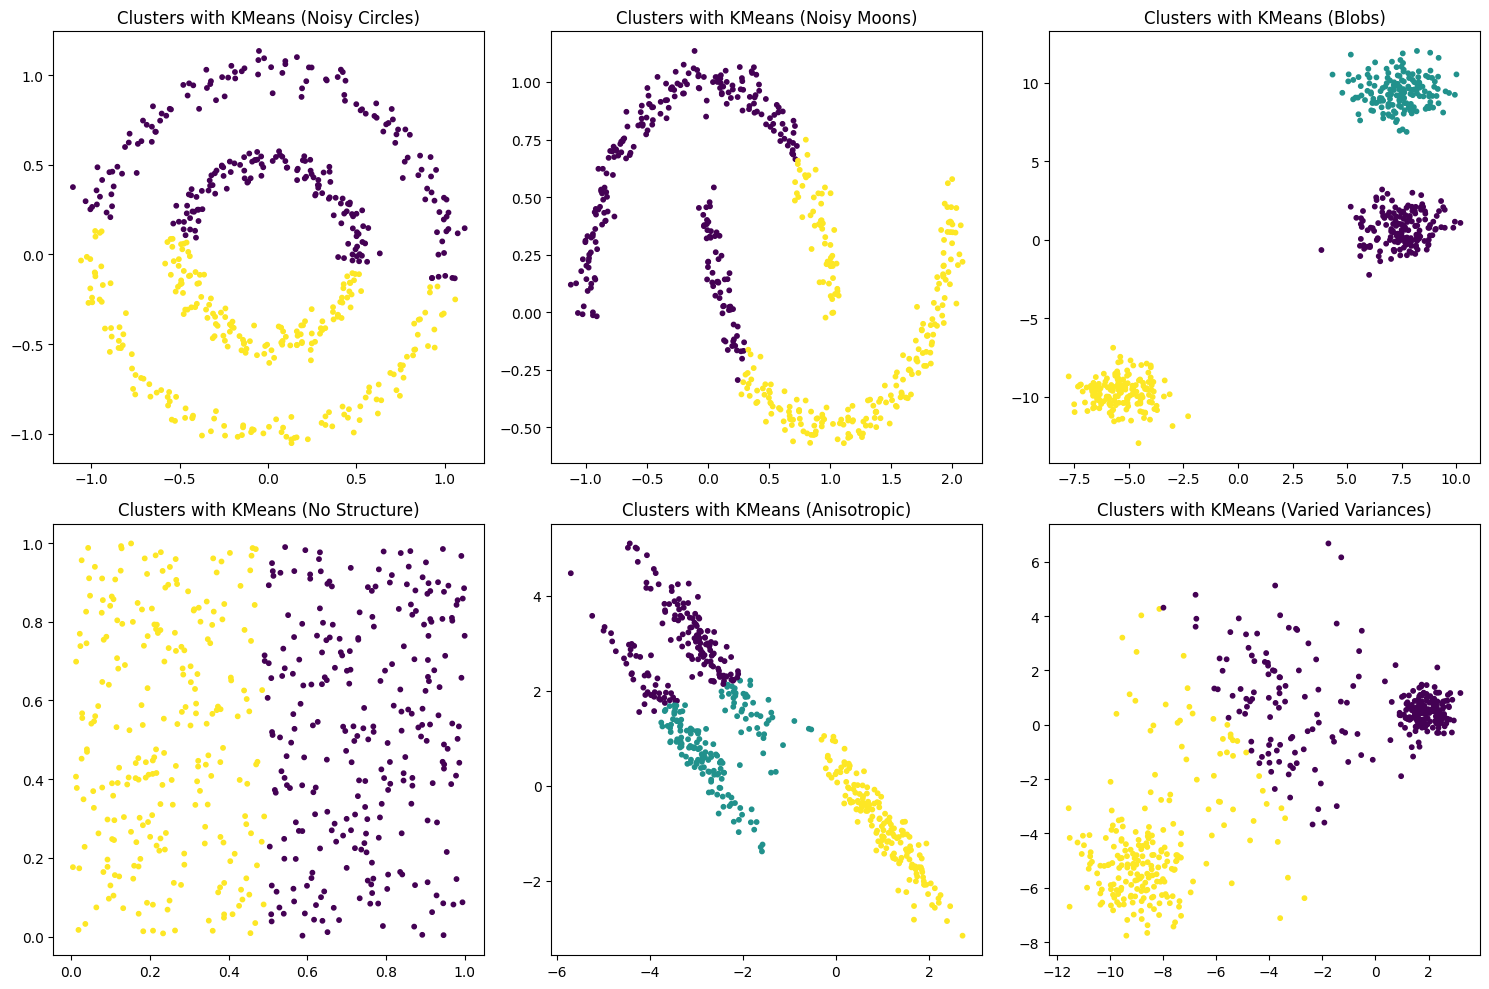

In [45]:
# Define a function to apply KMeans clustering and visualize the results
def visualize_kmeans(ax, kmeans_instance, X, title):
    # Fit the model to the data
    kmeans_instance.fit(X)
    
    # Get the cluster labels
    labels = kmeans_instance.labels
    
    # Visualize the results
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    ax.set_title(f'Clusters with KMeans ({title})')

# Define the datasets
datasets = [
    ("Noisy Circles", noisy_circles[0]),
    ("Noisy Moons", noisy_moons[0]),
    ("Blobs", blobs[0]),
    ("No Structure", no_structure[0]),
    ("Anisotropic", aniso[0]),
    ("Varied Variances", varied[0])
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Apply KMeans and visualize the results for each dataset
for (name, data), ax in zip(datasets, axes.flatten()):
    if name in ["Blobs", "Anisotropic"]:
        kmeans_instance = KMeans(n_clusters=3)
    else:
        kmeans_instance = KMeans(n_clusters=2)
    visualize_kmeans(ax, kmeans_instance, data, name)

plt.tight_layout()
plt.show()




In [47]:
# Load the "Noisy Circles" dataset
X_noisy_circles = noisy_circles[0]

# Create an instance of the KMedoids class
kmedoids_instance = KMedoids(n_clusters=2)

# Fit the KMedoids model to the "Noisy Circles" dataset
kmedoids_instance.fit(X_noisy_circles)

# Visualize the clusters
plt.scatter(X_noisy_circles[:, 0], X_noisy_circles[:, 1], c=kmedoids_instance.labels, cmap='viridis', s=10)
plt.title('Clusters with KMedoids (Noisy Circles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


IndexError: index 2 is out of bounds for axis 1 with size 2